<a href="https://colab.research.google.com/github/vipingupta1907/2011MT22_CS575/blob/main/Assignment4/ElectricProduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4 Electric Production dataset solution by 2011MT22_Vipin

#Electric Production Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,kpss
import warnings 
warnings.simplefilter('ignore')

In [2]:
!pip install statsmodels==0.12.2 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/cs575ts/Assignments/main/Assignment_4/Electric_Production.csv")
df.head()

DATE  IPG2211A2N
0  1/1/1985     72.5052
1  2/1/1985     70.6720
2  3/1/1985     62.4502
3  4/1/1985     57.4714
4  5/1/1985     55.3151

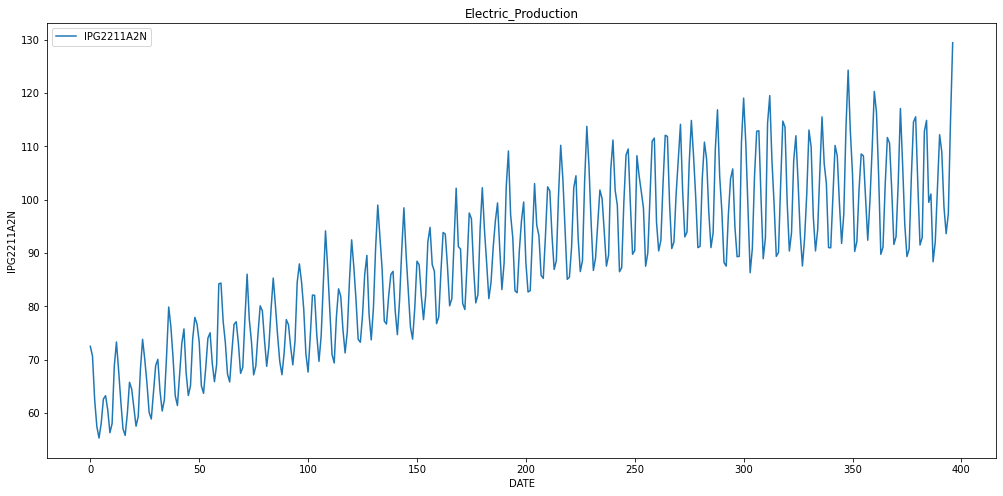

In [4]:
MEP = df.plot(figsize=(17, 8))
plt.title('Electric_Production')
MEP.set_ylabel('IPG2211A2N')
MEP.set_xlabel('DATE')

plt.show()

#a.) Test for Stationary

In [5]:
#define function for ADF test
def adf_test(atr):
    timeseries = df[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

adf_test('IPG2211A2N')    

Results of Dickey-Fuller Test for  IPG2211A2N 

Test Statistic                  -2.256990
p-value                          0.186215
#Lags Used                      15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64


> P value is greater than 0.05 so its non stationary dataset



In [6]:
#define function for kpss test
def kpss_test(atr):
    timeseries = df[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

kpss_test('IPG2211A2N')

Results of KPSS Test for  IPG2211A2N
Test Statistic            2.206192
p-value                   0.010000
Lags Used                17.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


> p value is less thn 0.05 so its non stationary dataset

As From ADF and KPSS test, given dataset is non stationary time series

#b.) evidence of seasonality and non stationary by graph

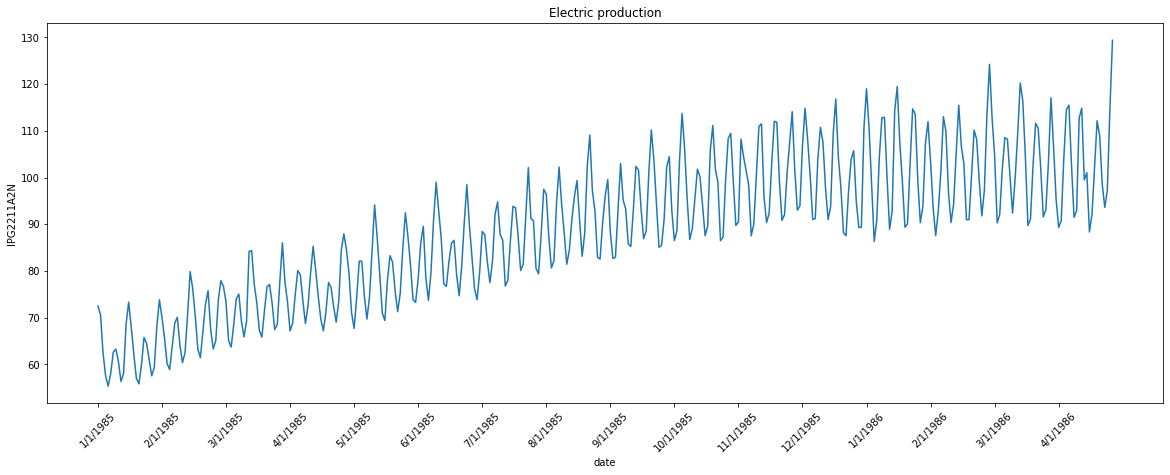

In [7]:
plt.figure(figsize=(20, 7))
plt.plot(df['IPG2211A2N'])
plt.xticks([i for i in range(0,396,25)],df.DATE, rotation=45)
plt.xlabel("date")
plt.ylabel("IPG2211A2N")
plt.title('Electric production')
plt.show()

In [8]:
df['meanRoll'] = df['IPG2211A2N'].rolling(5).mean()
df['stdRoll'] = df['IPG2211A2N'].rolling(5).std()
df.head(15)

DATE  IPG2211A2N  meanRoll   stdRoll
0    1/1/1985     72.5052       NaN       NaN
1    2/1/1985     70.6720       NaN       NaN
2    3/1/1985     62.4502       NaN       NaN
3    4/1/1985     57.4714       NaN       NaN
4    5/1/1985     55.3151  63.68278  7.694200
5    6/1/1985     58.0904  60.79982  6.096827
6    7/1/1985     62.6202  59.18946  3.223846
7    8/1/1985     63.2485  59.34912  3.438337
8    9/1/1985     60.5846  59.97176  3.292067
9   10/1/1985     56.3154  60.17182  2.951067
10  11/1/1985     58.0005  60.15384  2.967149
11  12/1/1985     68.7145  61.37270  4.873135
12   1/1/1986     73.3057  63.38414  7.308183
13   2/1/1986     67.9869  64.86460  7.348934
14   3/1/1986     62.2221  66.04594  5.977949

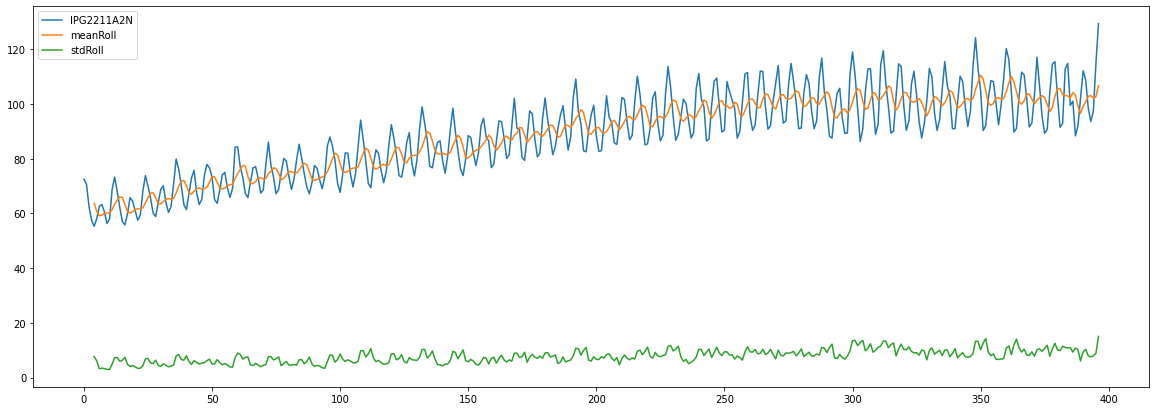

In [9]:
df.plot(figsize=[20,7])
df.drop(df.columns[-2:],axis=1,inplace=True)

from the avove two graphs, it can be seen that this dataset is having a seasonality and dataset is nonstationary. we need to bring this Non stationary dataset into stationary by doing different differencing. 

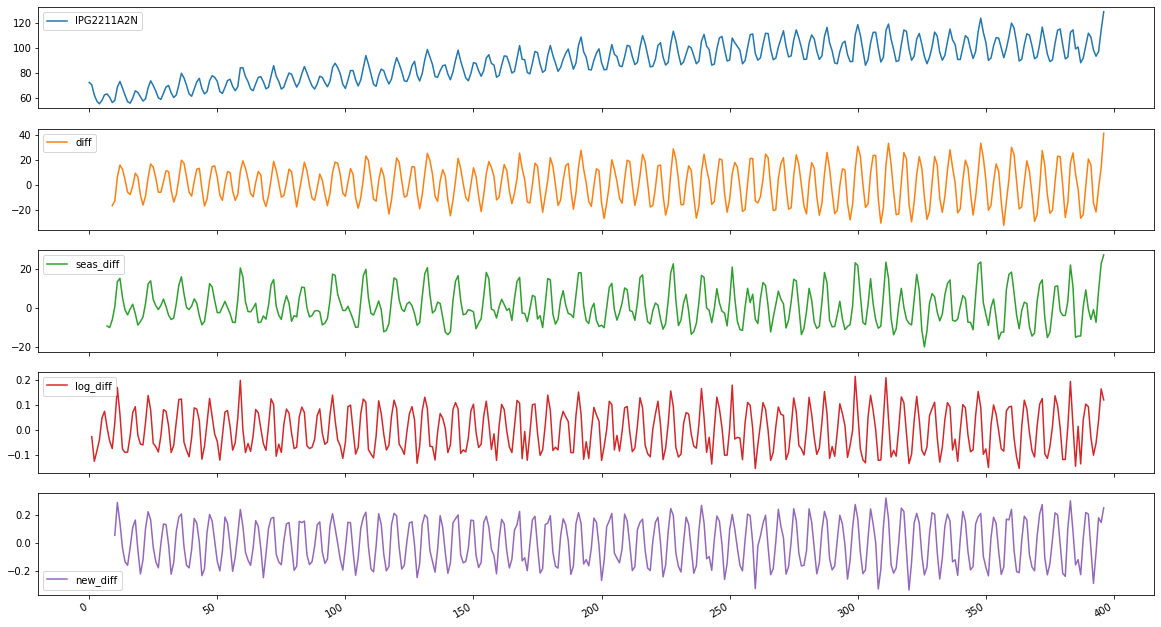

In [10]:
# Differencing
df['diff'] = df['IPG2211A2N'].diff(periods=9)

# Seasonal Differencing
df['seas_diff'] = df['IPG2211A2N'].diff(periods=7)

# Transformation (here we use log transformation)
df_log = np.log(df['IPG2211A2N'])
df['log_diff'] = df_log.diff(periods=1)

df['new_diff'] = df['log_diff'].diff(periods=9)

df.plot(subplots=True, figsize=(20,12))
plt.show()

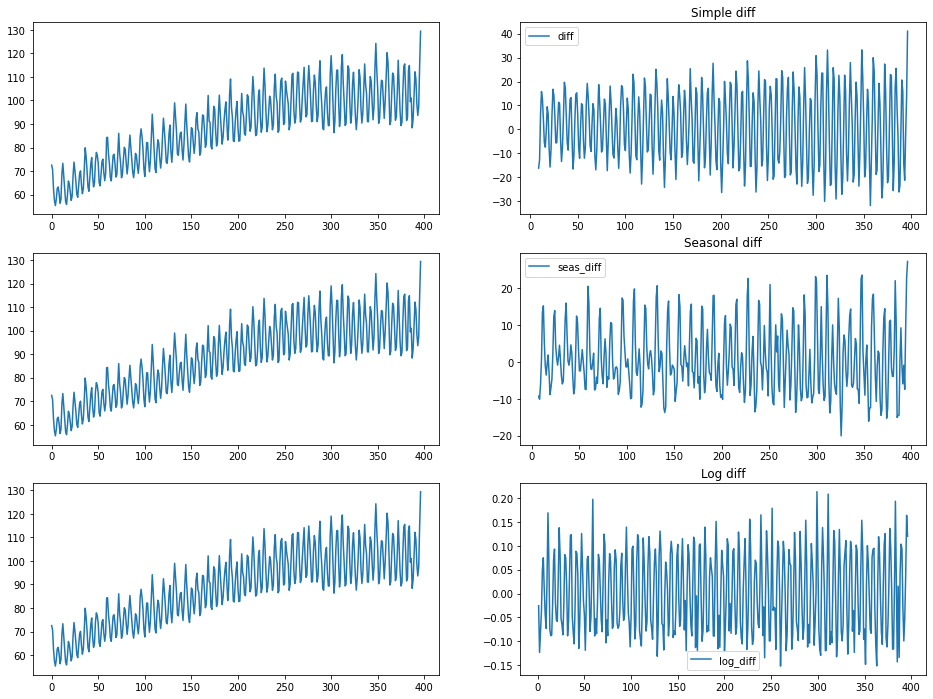

In [11]:
# visualize
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
df['IPG2211A2N'].plot()
plt.subplot(3,2,2)
df['diff'].plot()
plt.title('Simple diff')
plt.legend()

plt.subplot(3,2,3)
df['IPG2211A2N'].plot()
plt.subplot(3,2,4)
df['seas_diff'].plot()
plt.title('Seasonal diff')
plt.legend()

plt.subplot(3,2,5)
df['IPG2211A2N'].plot()
plt.subplot(3,2,6)
df['log_diff'].plot()
plt.title('Log diff')
plt.legend()


plt.show()

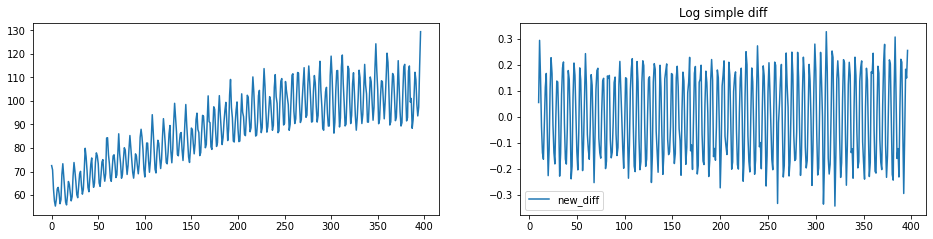

In [12]:
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
df['IPG2211A2N'].plot()
plt.subplot(3,2,2)
df['new_diff'].plot()
plt.title('Log simple diff')
plt.legend()
plt.show()

In [13]:
adf_test('diff')

print("\n")

kpss_test('diff')

Results of Dickey-Fuller Test for  diff 

Test Statistic                -6.226866e+00
p-value                        5.063716e-08
#Lags Used                     1.700000e+01
Number of Observations Used    3.700000e+02
Critical Value (1%)           -3.448148e+00
Critical Value (5%)           -2.869383e+00
Critical Value (10%)          -2.570948e+00
dtype: float64


Results of KPSS Test for  diff
Test Statistic            0.271746
p-value                   0.100000
Lags Used                17.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [14]:
adf_test('seas_diff')

print("\n")

kpss_test('seas_diff')

Results of Dickey-Fuller Test for  seas_diff 

Test Statistic                  -4.904878
p-value                          0.000034
#Lags Used                      17.000000
Number of Observations Used    372.000000
Critical Value (1%)             -3.448052
Critical Value (5%)             -2.869341
Critical Value (10%)            -2.570926
dtype: float64


Results of KPSS Test for  seas_diff
Test Statistic            0.117583
p-value                   0.100000
Lags Used                17.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [15]:
adf_test('log_diff')

print("\n")

kpss_test('log_diff')

Results of Dickey-Fuller Test for  log_diff 

Test Statistic                -6.748333e+00
p-value                        2.995161e-09
#Lags Used                     1.400000e+01
Number of Observations Used    3.810000e+02
Critical Value (1%)           -3.447631e+00
Critical Value (5%)           -2.869156e+00
Critical Value (10%)          -2.570827e+00
dtype: float64


Results of KPSS Test for  log_diff
Test Statistic            0.11078
p-value                   0.10000
Lags Used                17.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


In [16]:
adf_test('new_diff')

print("\n")

kpss_test('new_diff')

Results of Dickey-Fuller Test for  new_diff 

Test Statistic                -8.586179e+00
p-value                        7.496770e-14
#Lags Used                     1.700000e+01
Number of Observations Used    3.690000e+02
Critical Value (1%)           -3.448197e+00
Critical Value (5%)           -2.869405e+00
Critical Value (10%)          -2.570960e+00
dtype: float64


Results of KPSS Test for  new_diff
Test Statistic            0.152158
p-value                   0.100000
Lags Used                17.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


So from the above its clear that log differencing is giving a better stationarity time series

#c.) ACF and PACF plot

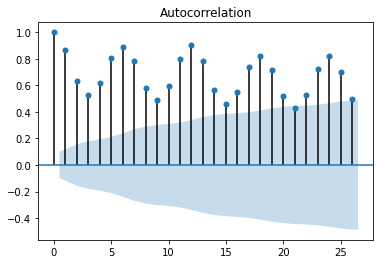

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['IPG2211A2N'])
plt.show()

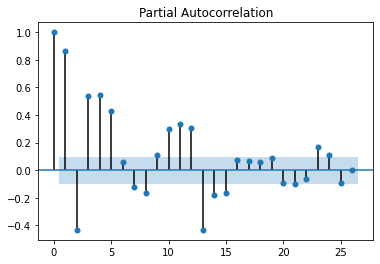

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['IPG2211A2N'])
plt.show()

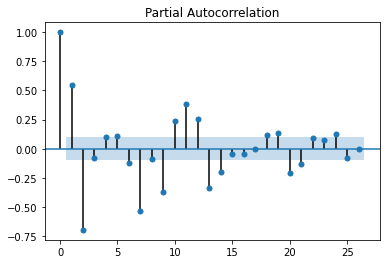

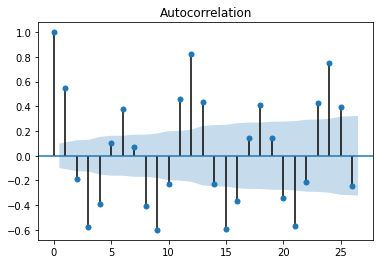

In [19]:
plot_pacf(df.seas_diff.dropna());
plot_acf(df.seas_diff.dropna());

# AR model

In [20]:
# Defining mean function 
def mean_func(arr):
  sum=0
  for i in arr:
    sum = sum +i
  mean = sum/len(arr)
  return mean

# Defining my own function for NSE
def NSE(e,s):
  diff = []
  num_sum = 0
  denom_sum = 0
  for i,j in zip(e, s):
    diff.append(i-j)
  for i in diff:
    num_sum = num_sum + i**2
  for k in e:
    denom_sum = denom_sum + (k-(mean_func(e)))**2
  nse = 1-(num_sum/denom_sum) 
  return nse   

In [21]:
# Defining my function for R-Squared
def rsquared(e,s):
  mean_e = mean_func(e)
  mean_s = mean_func(s)
  num_sum = 0
  for i,j in zip(e,s): 
    num_sum = num_sum + (i - mean_e)*(j - mean_s)
  denom_sum1 = 0
  for p in e: 
    denom_sum1 = (denom_sum1 + (p - mean_e)**2)
  denom_sum2 = 0
  for q in s: 
    denom_sum2 = (denom_sum2 + (q - mean_s)**2)
  denom1 = (denom_sum1)**0.5
  denom2 = (denom_sum2)**0.5
  r_squared = (num_sum/(denom1*denom2))**2
  return r_squared

In [22]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from math import sqrt

RMSE of different interval for AR model is :  0.056990993697167834
RSquared of different interval for AR model is :  0.9013170133127051
NSE of different interval for AR model is :  0.8979384558606125


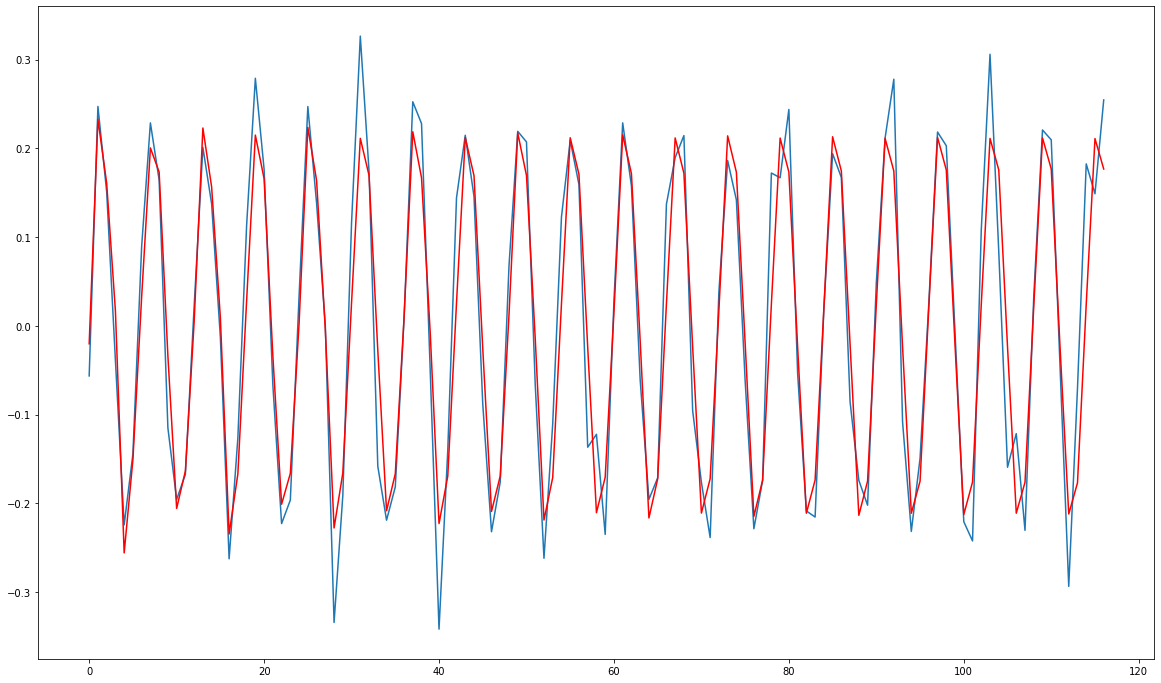

RMSE of different interval for AR model is :  0.06030633417599983
RSquared of different interval for AR model is :  0.8938266191586505
NSE of different interval for AR model is :  0.8865187801806875


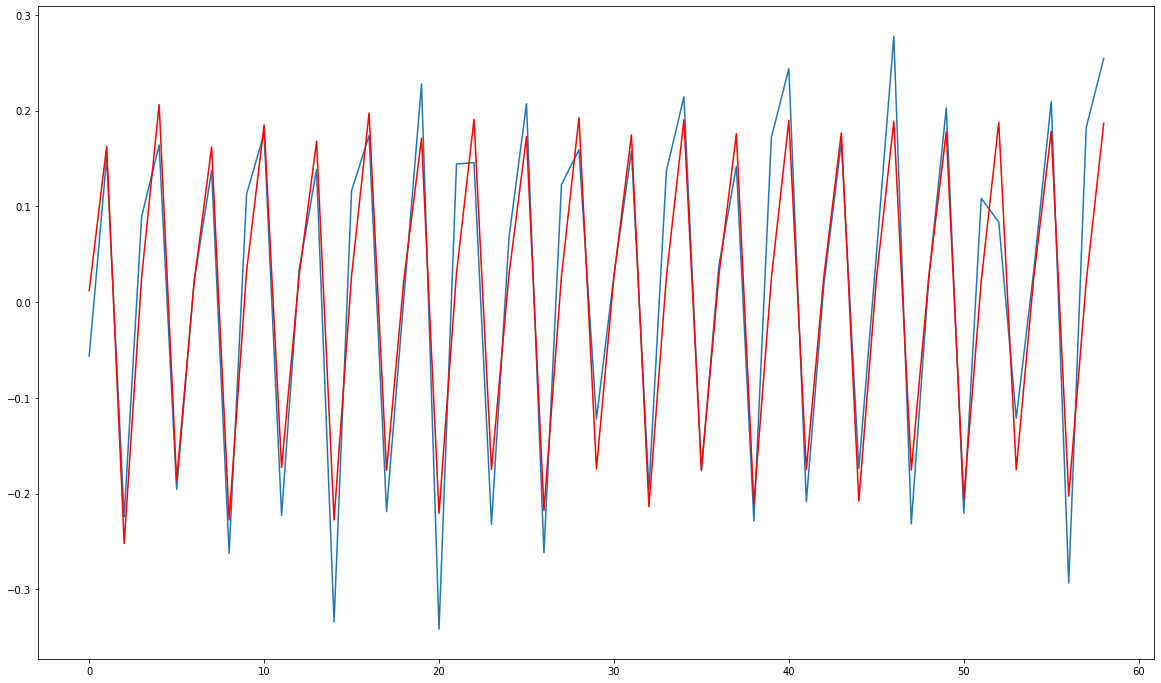

RMSE of different interval for AR model is :  0.06402808512621024
RSquared of different interval for AR model is :  0.6524473506861713
NSE of different interval for AR model is :  0.5056220846575183


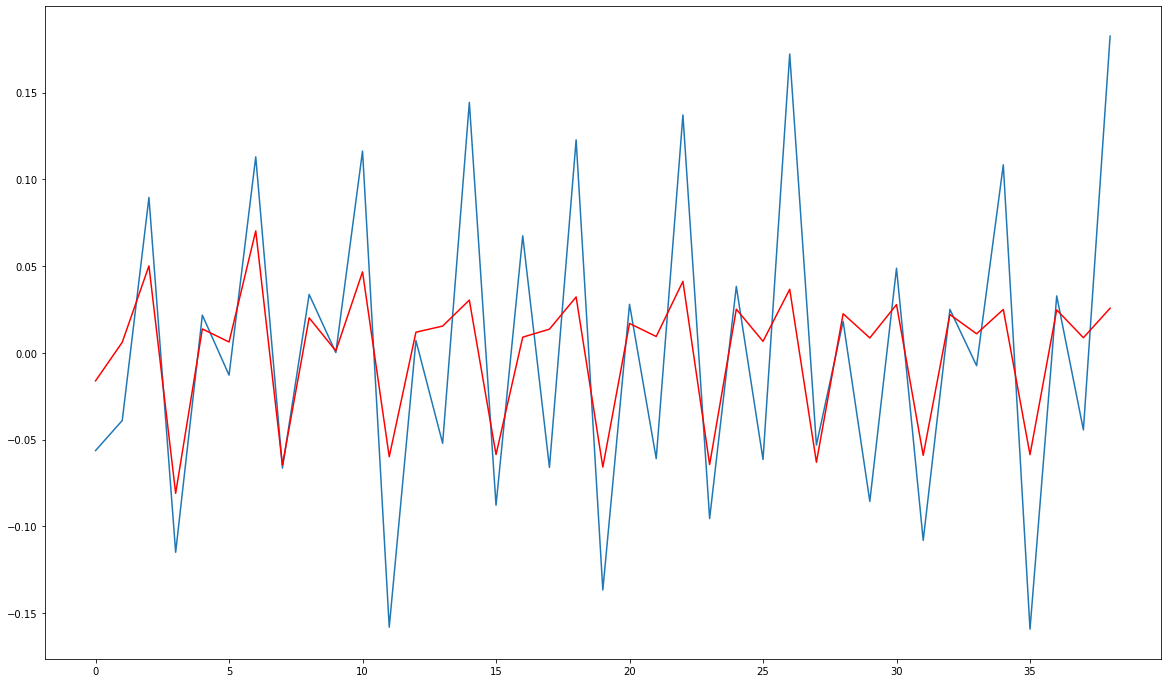

RMSE of different interval for AR model is :  0.055447064155519615
RSquared of different interval for AR model is :  0.890021307975776
NSE of different interval for AR model is :  0.8870457626753673


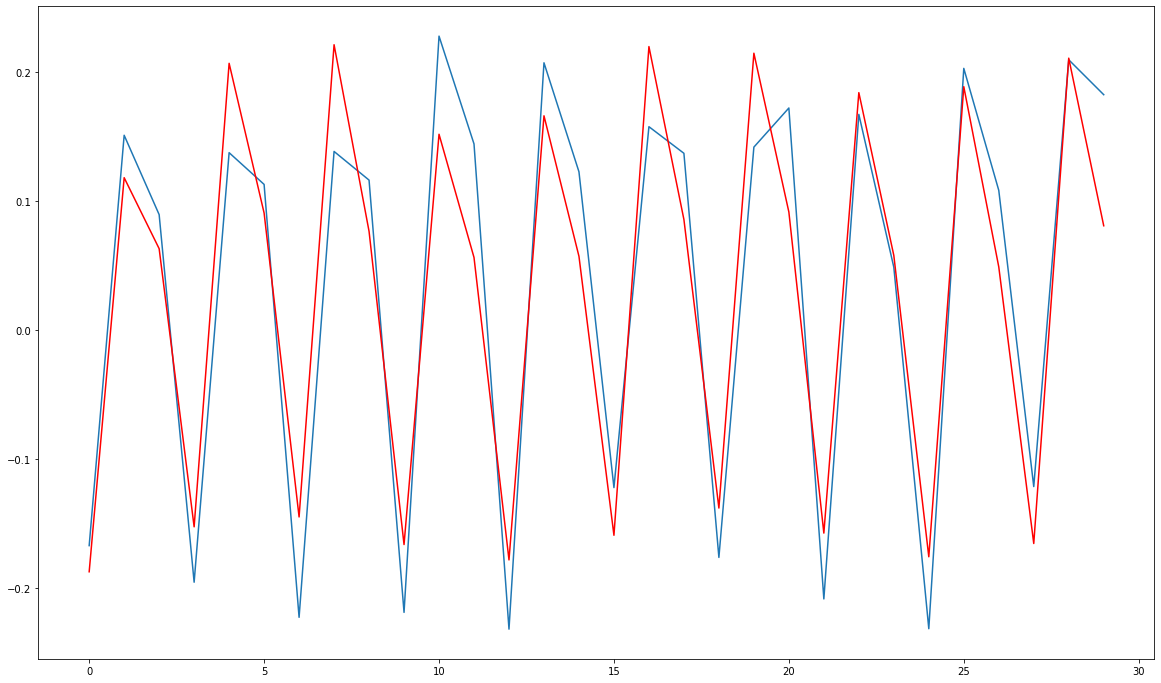

In [23]:
data1 = df['new_diff'].dropna().to_numpy()
ds1 = [data1[0::1],data1[0::2],data1[0::3],data1[0::4]]
for i in ds1:
  n = int(len(i)*0.7)
  train, test = i[:n], i[n:]
  # fit model
  model = AutoReg(train, lags=15)
  model_fit = model.fit()

# make prediction
  yhat = model_fit.predict(len(train), len(train)+len(test)-1)
  rmse = sqrt(mean_squared_error(test, yhat))
  r_squared = rsquared(test,yhat)
  n_s_e = NSE(test,yhat)
  print("RMSE of different interval for AR model is : ",rmse)
  print("RSquared of different interval for AR model is : ",r_squared)
  print("NSE of different interval for AR model is : ",n_s_e)
  plt.figure(figsize=(20,12))
  plt.plot(test)
  plt.plot(yhat, color='red')
  plt.show()

In [24]:
data = df['log_diff'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]

# fit model
model = AutoReg(train, lags=15)
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
r_squared = rsquared(test,yhat)
n_s_e = NSE(test,yhat)

print("RMSE for AR model is : ",rmse)
print("RSquared for AR model is : ",r_squared)
print("NSE for AR model is : ",n_s_e)

RMSE for AR model is :  0.03907198478664904
RSquared for AR model is :  0.8462845519107913
NSE for AR model is :  0.8253745991585473


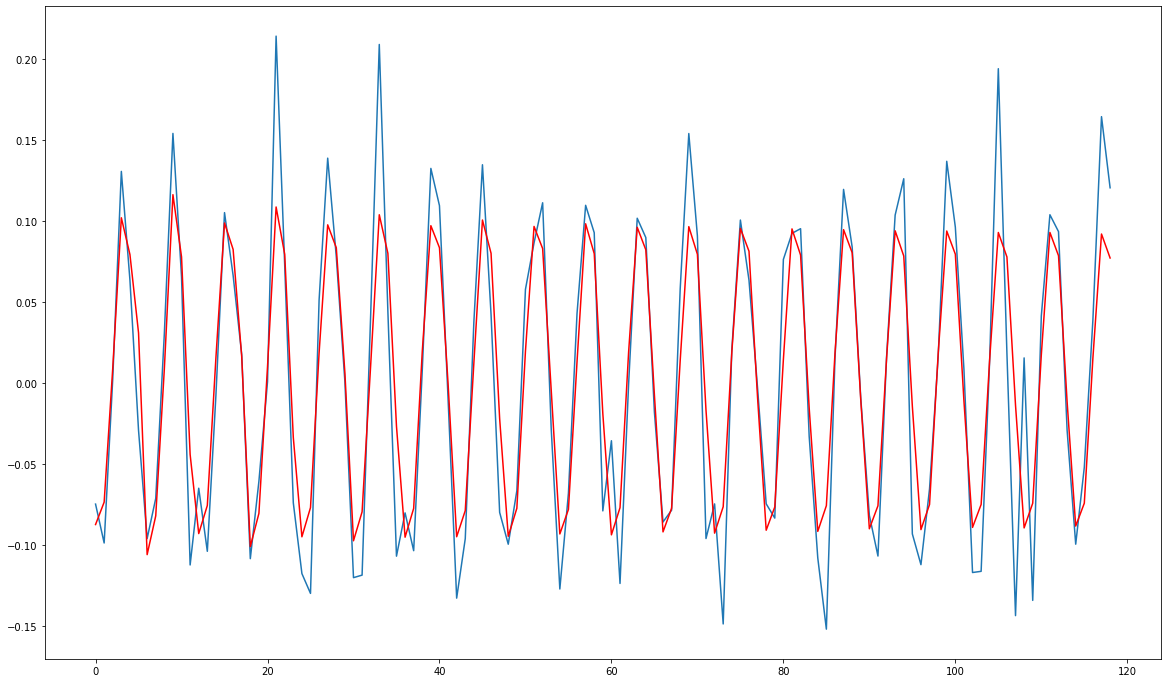

In [25]:
# plot results
plt.figure(figsize=(20,12))
plt.plot(test)
plt.plot(yhat, color='red')
plt.show()

# MA model

RMSE of different interval for MA model is :  0.22061312309855366
RSquared of different interval for MA model is :  0.718515247791849
NSE of different interval for MA model is :  -0.5293692763031361


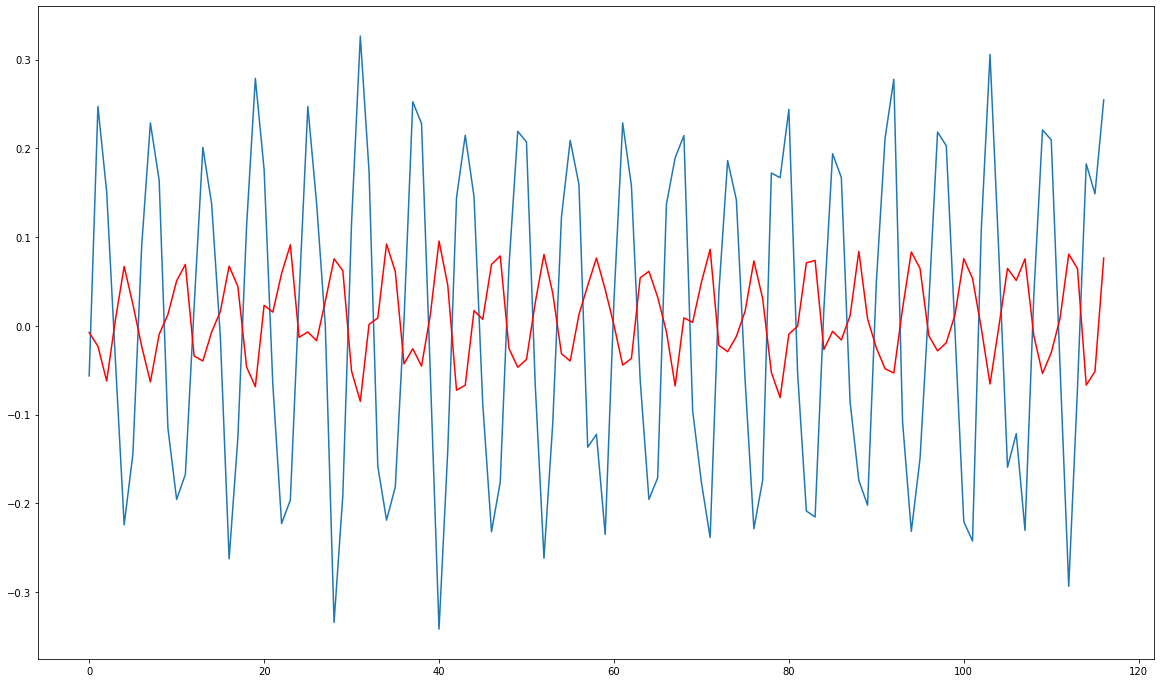

RMSE of different interval for MA model is :  0.19713369124182487
RSquared of different interval for MA model is :  0.09955546226554574
NSE of different interval for MA model is :  -0.2126063648152856


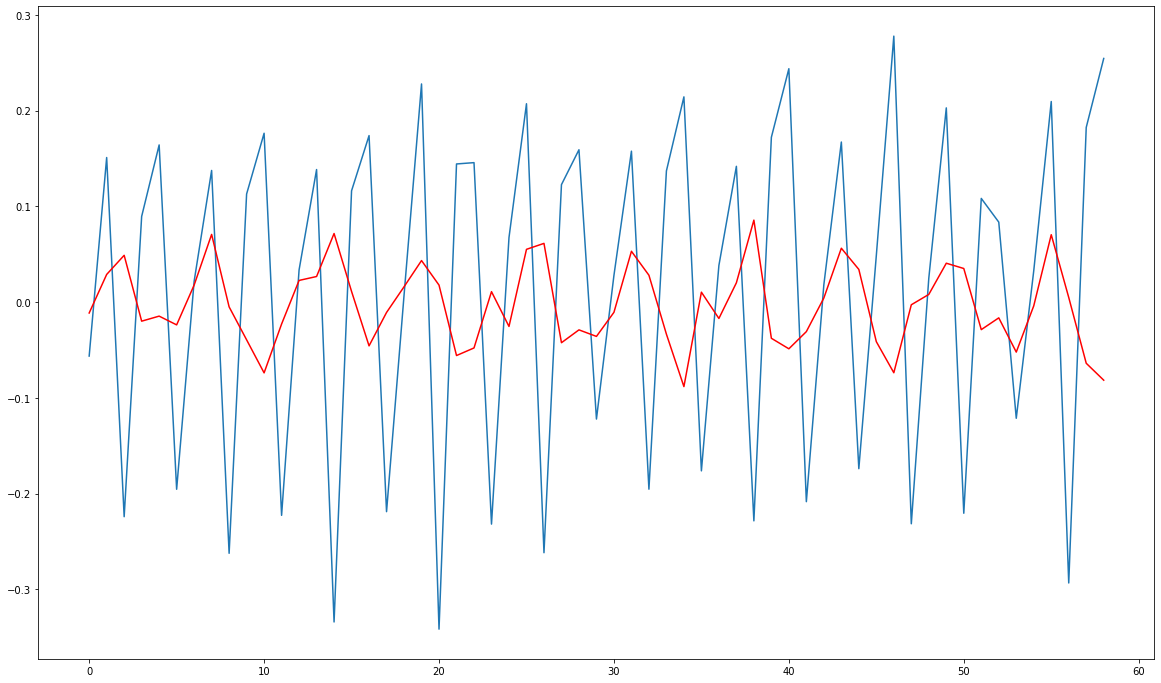

RMSE of different interval for MA model is :  0.10453442323001463
RSquared of different interval for MA model is :  0.014907374039190938
NSE of different interval for MA model is :  -0.3177611185895488


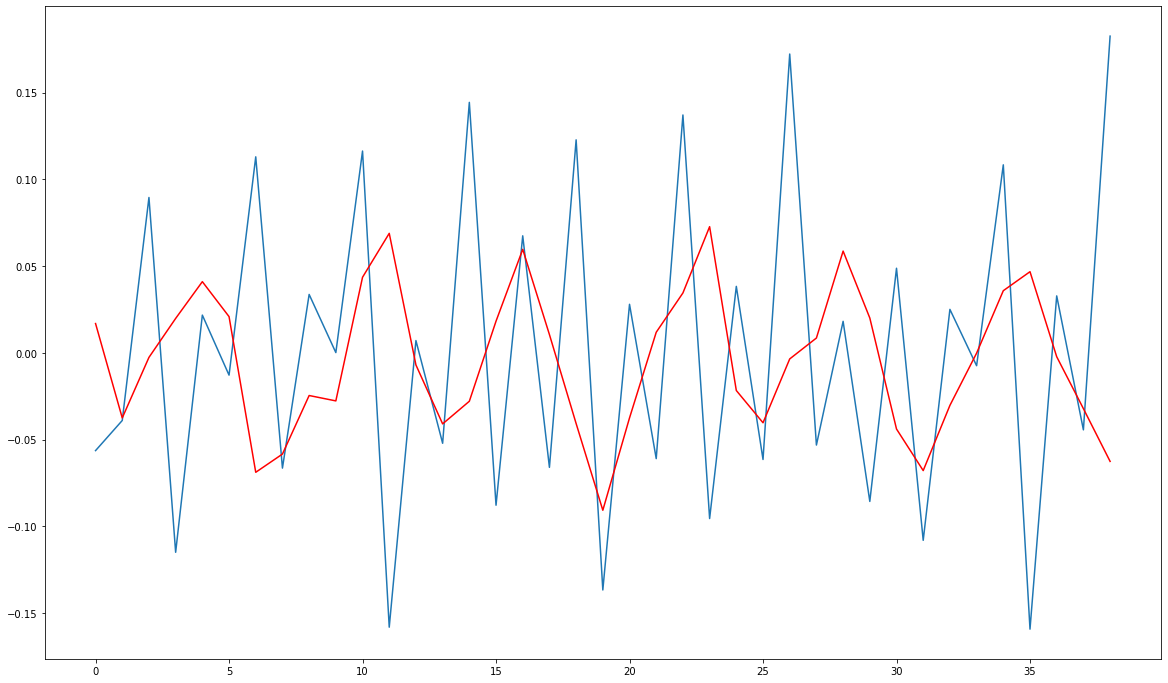

RMSE of different interval for MA model is :  0.17027358300116746
RSquared of different interval for MA model is :  0.00938914174668857
NSE of different interval for MA model is :  -0.06522160317672299


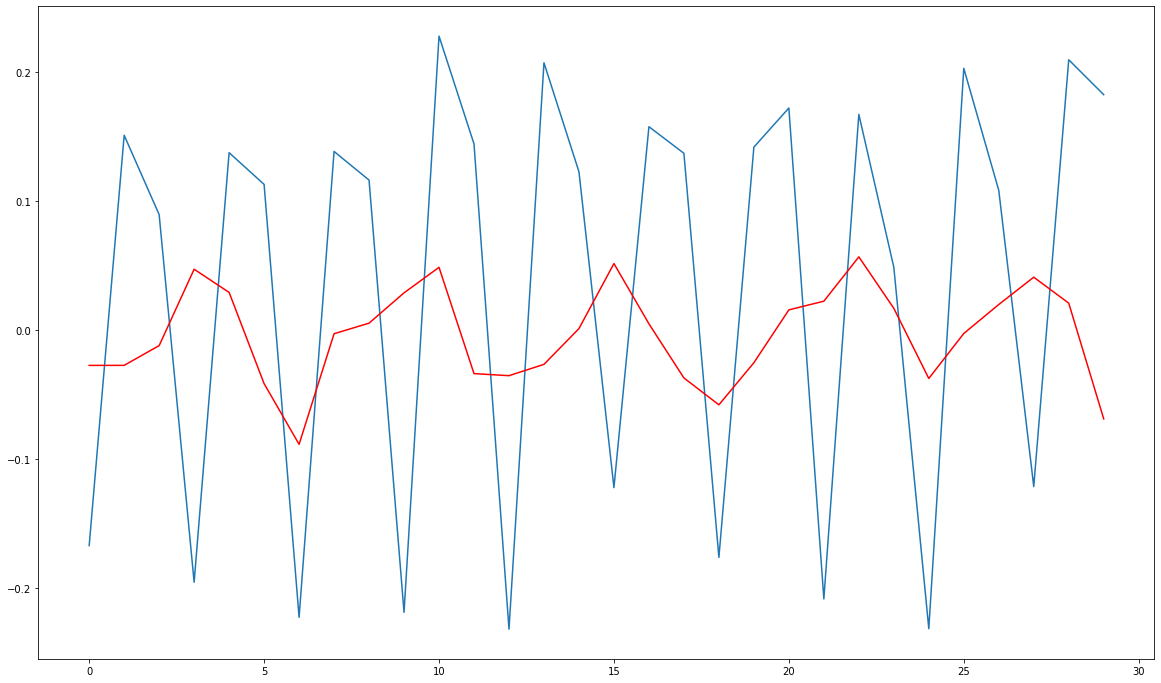

In [26]:
data1 = df['new_diff'].dropna().to_numpy()
ds1 = [data1[0::1],data1[0::2],data1[0::3],data1[0::4]]
for i in ds1:
  n = int(len(i)*0.7)
  train, test = i[:n], i[n:]
  # fit model
  model = ARIMA(data, order=(0, 0, 3))
  model_fit = model.fit()

# make prediction
  yhat = model_fit.predict(len(train), len(train)+len(test)-1)
  rmse = sqrt(mean_squared_error(test, yhat))
  r_squared = rsquared(test,yhat)
  n_s_e = NSE(test,yhat)
  print("RMSE of different interval for MA model is : ",rmse)
  print("RSquared of different interval for MA model is : ",r_squared)
  print("NSE of different interval for MA model is : ",n_s_e)
  plt.figure(figsize=(20,12))
  plt.plot(test)
  plt.plot(yhat, color='red')
  plt.show()

In [27]:
data = df['log_diff'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]

# fit model
model = ARIMA(data, order=(0, 0, 3))
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
r_squared = rsquared(test,yhat)
n_s_e = NSE(test,yhat)

print("RMSE for MA model is : ",rmse)
print("RSquared for MA model is : ",r_squared)
print("NSE for MA model is : ",n_s_e)

RMSE for MA model is :  0.0626867039201756
RSquared for MA model is :  0.6387751627808074
NSE for MA model is :  0.5505024385732796


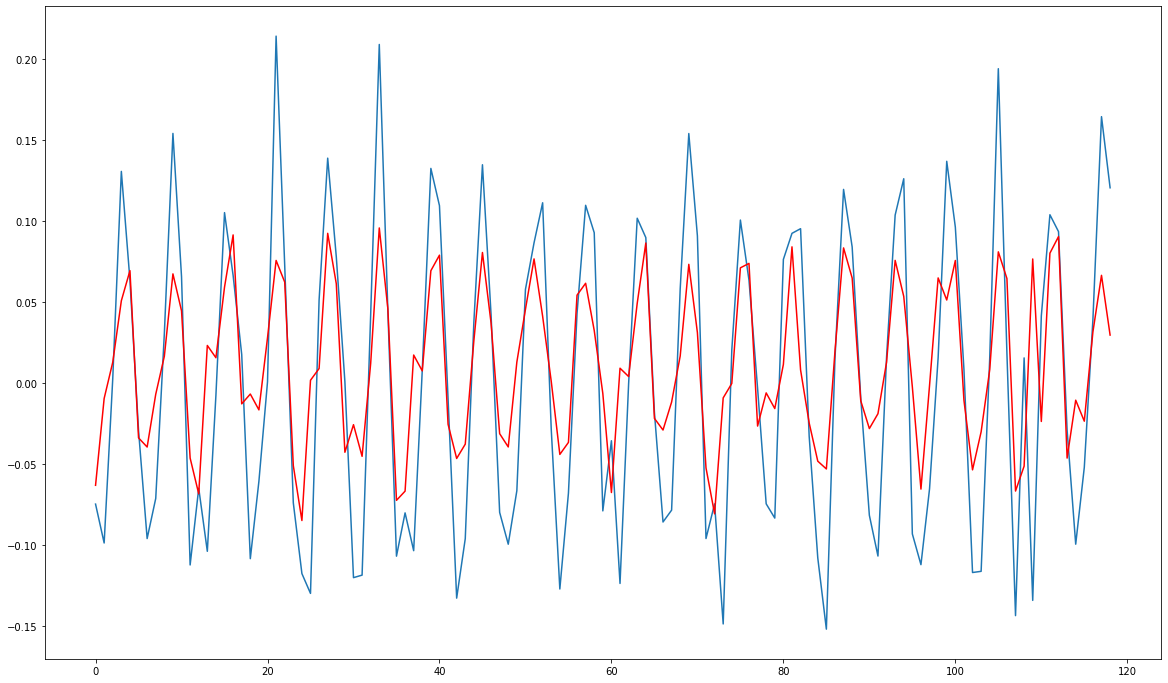

In [28]:
# plot results
plt.figure(figsize=(20,12))
plt.plot(test)
plt.plot(yhat, color='red')
plt.show()

# ARMA model

RMSE of different interval for ARMA model is :  0.2600168100739382
RSquared of different interval for ARMA model is :  0.914147195725566
NSE of different interval for ARMA model is :  -1.1244794173597996


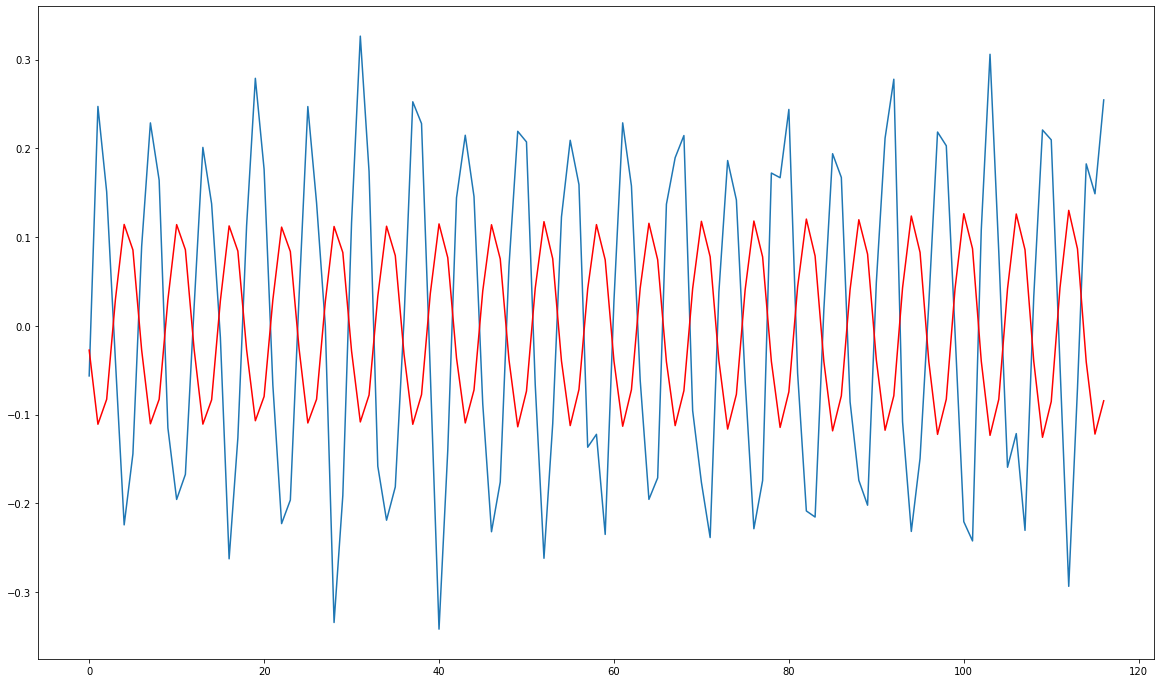

RMSE of different interval for ARMA model is :  0.20126797285033451
RSquared of different interval for ARMA model is :  0.017649485766934064
NSE of different interval for ARMA model is :  -0.26400118308870546


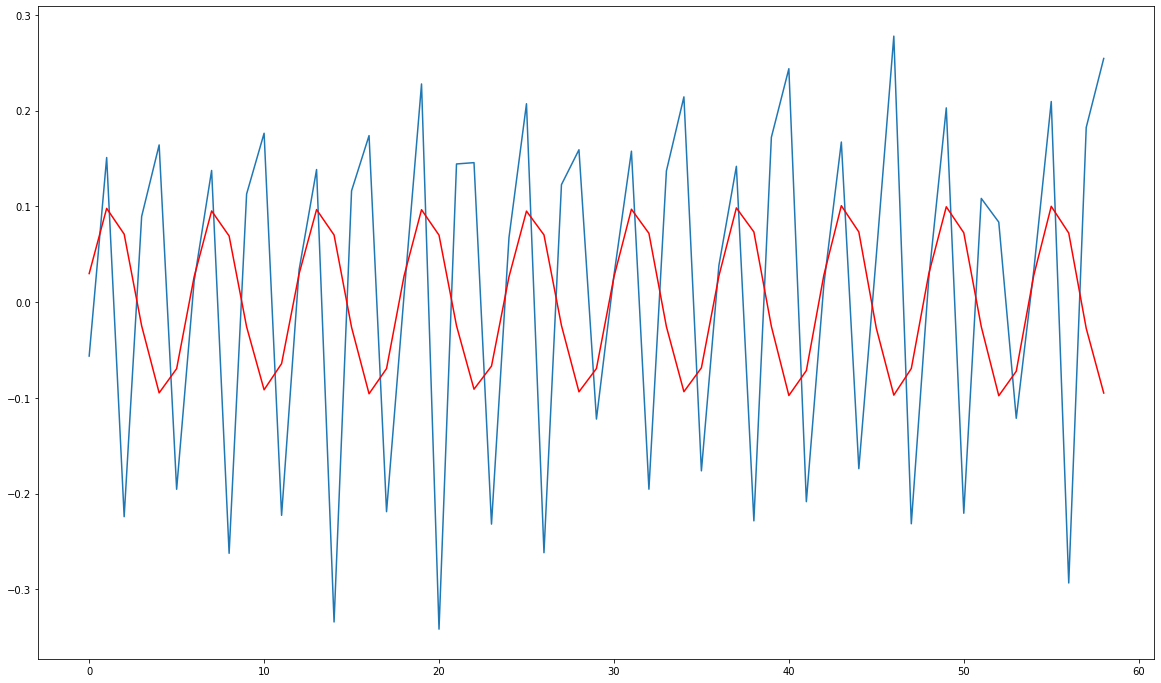

RMSE of different interval for ARMA model is :  0.11521312497450623
RSquared of different interval for ARMA model is :  0.0028172478505352912
NSE of different interval for ARMA model is :  -0.6007442379811432


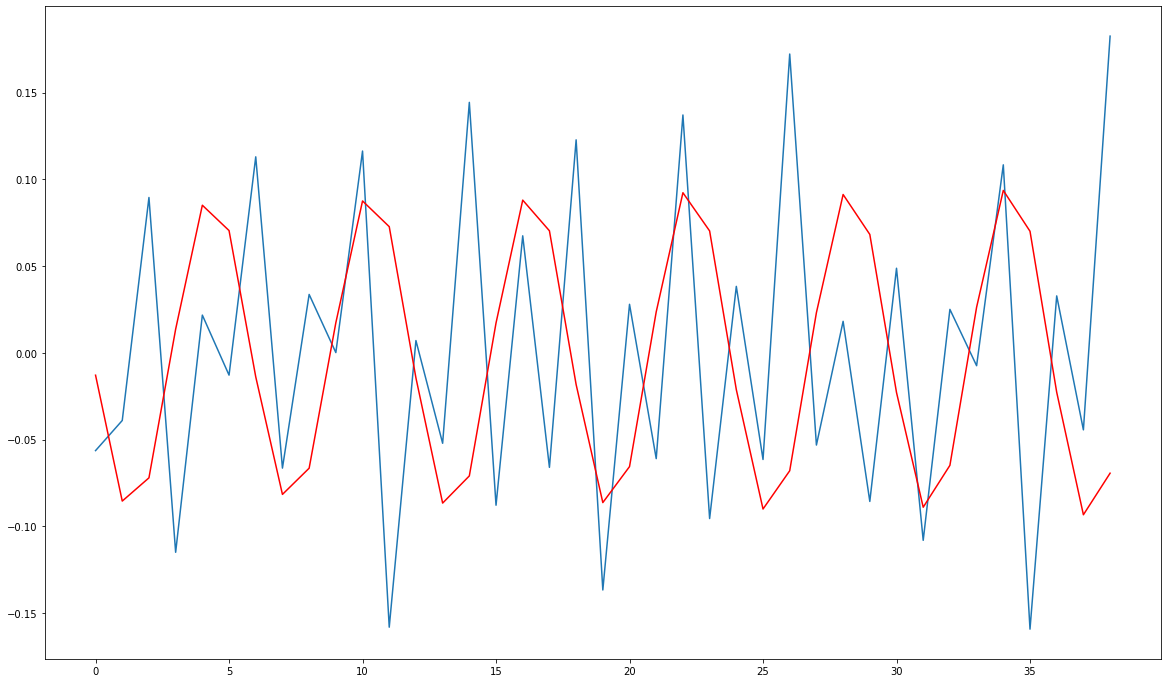

RMSE of different interval for ARMA model is :  0.17790416283137908
RSquared of different interval for ARMA model is :  0.003007745913028106
NSE of different interval for ARMA model is :  -0.16283377268326404


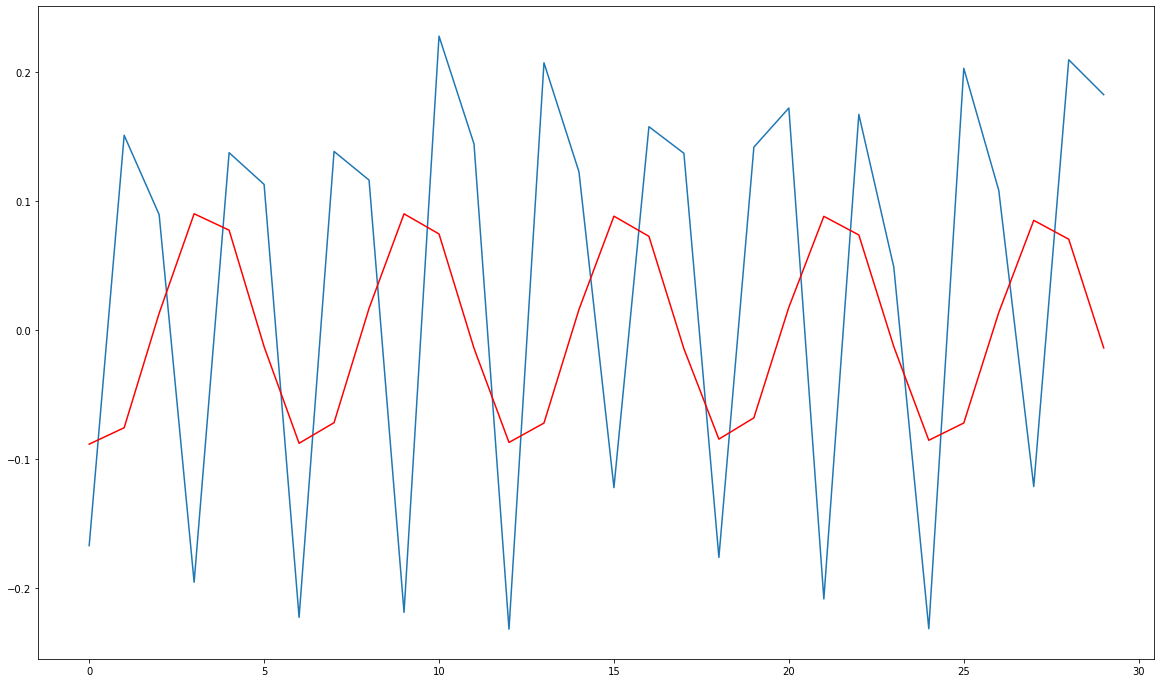

In [29]:
data1 = df['new_diff'].dropna().to_numpy()
ds1 = [data1[0::1],data1[0::2],data1[0::3],data1[0::4]]
for i in ds1:
  n = int(len(i)*0.7)
  train, test = i[:n], i[n:]
  # fit model
  model = ARIMA(data, order=(3, 0, 3))
  model_fit = model.fit()

# make prediction
  yhat = model_fit.predict(len(train), len(train)+len(test)-1)
  rmse = sqrt(mean_squared_error(test, yhat))
  r_squared = rsquared(test,yhat)
  n_s_e = NSE(test,yhat)
  print("RMSE of different interval for ARMA model is : ",rmse)
  print("RSquared of different interval for ARMA model is : ",r_squared)
  print("NSE of different interval for ARMA model is : ",n_s_e)
  plt.figure(figsize=(20,12))
  plt.plot(test)
  plt.plot(yhat, color='red')
  plt.show()

In [30]:
data = df['log_diff'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]

# fit model
model = ARIMA(data, order=(3, 0, 3))
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
r_squared = rsquared(test,yhat)
n_s_e = NSE(test,yhat)

print("RMSE for ARMA model is : ",rmse)
print("RSquared for ARMA model is : ",r_squared)
print("NSE for ARMA model is : ",n_s_e)

RMSE for ARMA model is :  0.03722107648288197
RSquared for ARMA model is :  0.8416087543854459
NSE for ARMA model is :  0.8415273470544534


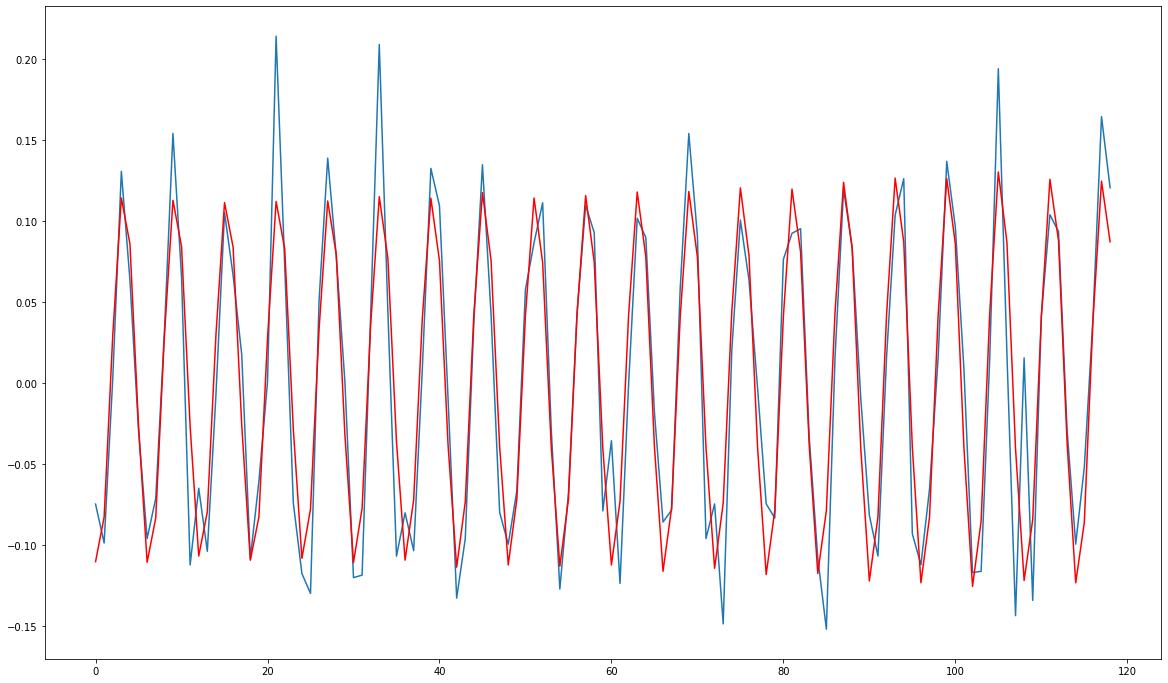

In [31]:
# plot results
plt.figure(figsize=(20,12))
plt.plot(test)
plt.plot(yhat, color='red')
plt.show()

# ARIMA model

RMSE of different interval for ARIMA model is :  0.2578088491990032
RSquared of different interval for ARIMA model is :  0.8852362177304257
NSE of different interval for ARIMA model is :  -1.0885521144117956


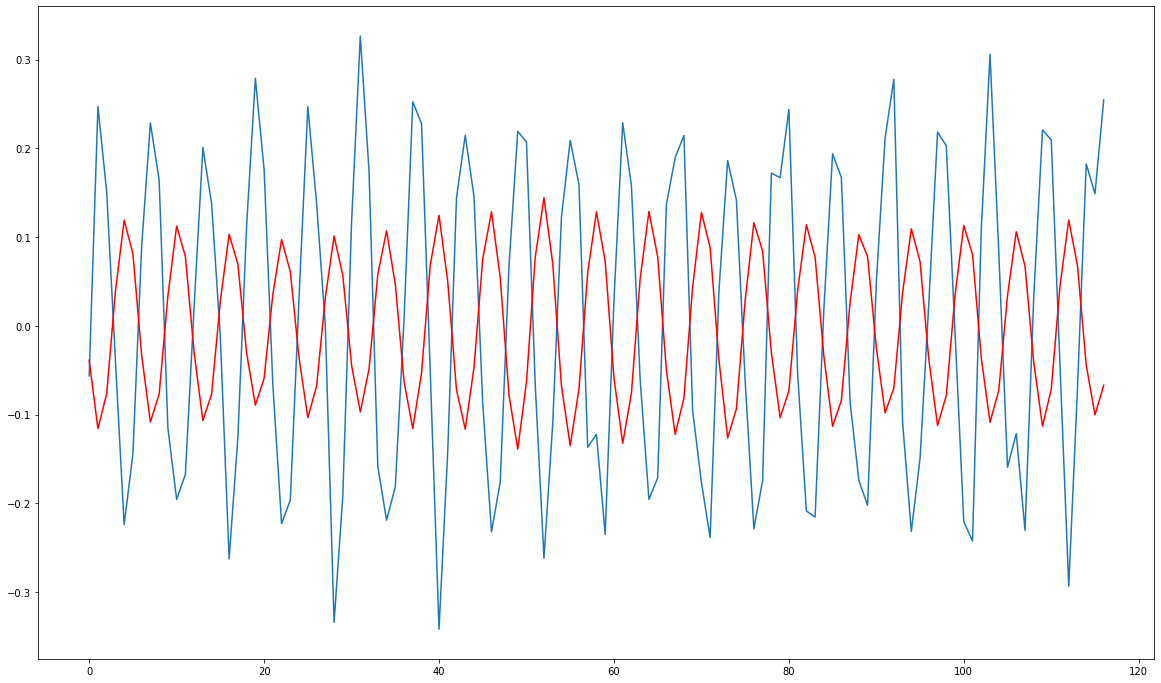

RMSE of different interval for ARIMA model is :  0.19935039944438407
RSquared of different interval for ARIMA model is :  0.016743630872990082
NSE of different interval for ARIMA model is :  -0.24003046768831382


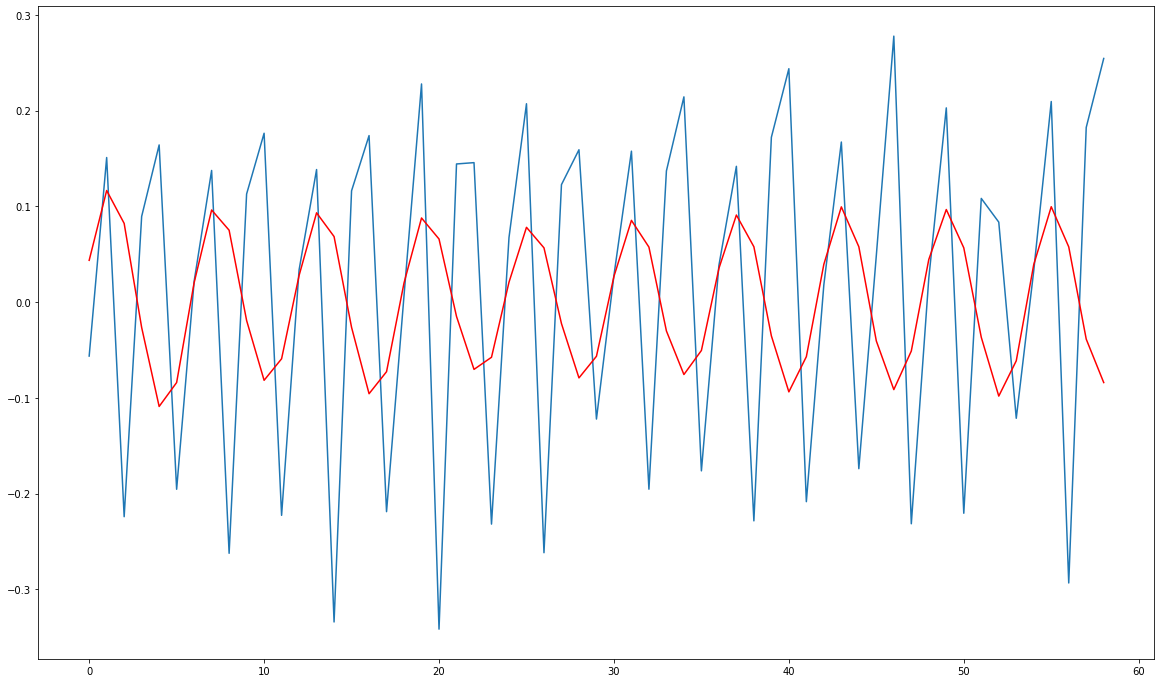

RMSE of different interval for ARIMA model is :  0.11719260760997487
RSquared of different interval for ARIMA model is :  0.0004967790482077489
NSE of different interval for ARIMA model is :  -0.6562216977538957


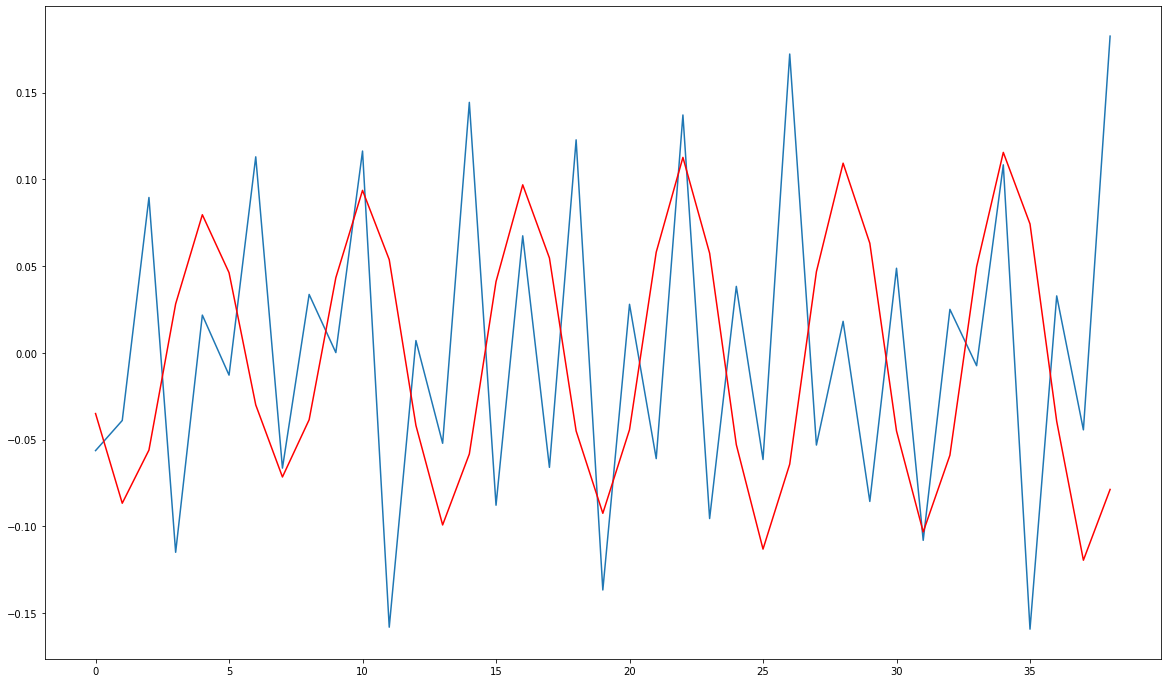

RMSE of different interval for ARIMA model is :  0.1755418427407909
RSquared of different interval for ARIMA model is :  0.0017712422293063741
NSE of different interval for ARIMA model is :  -0.13215717170951802


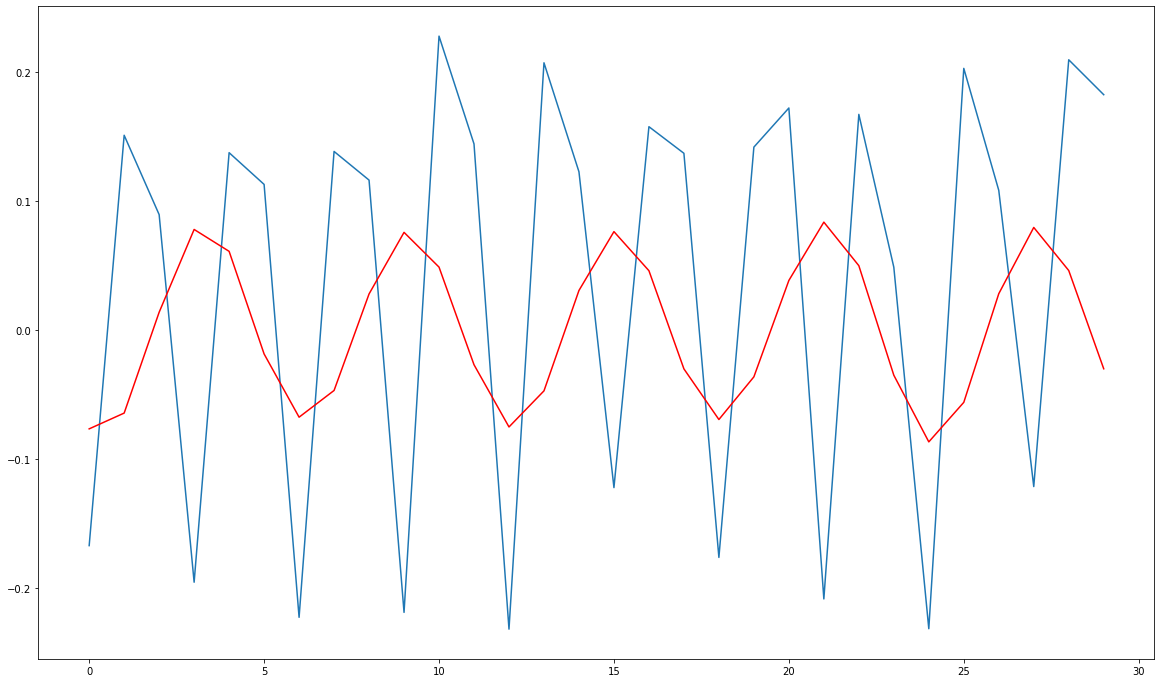

In [32]:
data1 = df['new_diff'].dropna().to_numpy()
ds1 = [data1[0::1],data1[0::2],data1[0::3],data1[0::4]]
for i in ds1:
  n = int(len(i)*0.7)
  train, test = i[:n], i[n:]
  # fit model
  model = ARIMA(data, order=(3, 1, 3))
  model_fit = model.fit()

# make prediction
  yhat = model_fit.predict(len(train), len(train)+len(test)-1)
  rmse = sqrt(mean_squared_error(test, yhat))
  r_squared = rsquared(test,yhat)
  n_s_e = NSE(test,yhat)
  print("RMSE of different interval for ARIMA model is : ",rmse)
  print("RSquared of different interval for ARIMA model is : ",r_squared)
  print("NSE of different interval for ARIMA model is : ",n_s_e)
  plt.figure(figsize=(20,12))
  plt.plot(test)
  plt.plot(yhat, color='red')
  plt.show()

In [33]:
data = df['log_diff'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]

# fit model
model = ARIMA(data, order=(3, 1, 3))
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
r_squared = rsquared(test,yhat)
n_s_e = NSE(test,yhat)

print("RMSE for ARIMA model is : ",rmse)
print("RSquared for ARIMA model is : ",r_squared)
print("NSE for ARIMA model is : ",n_s_e)

RMSE for ARIMA model is :  0.0400667468875102
RSquared for ARIMA model is :  0.8171187670659528
NSE for ARIMA model is :  0.8163695769907755


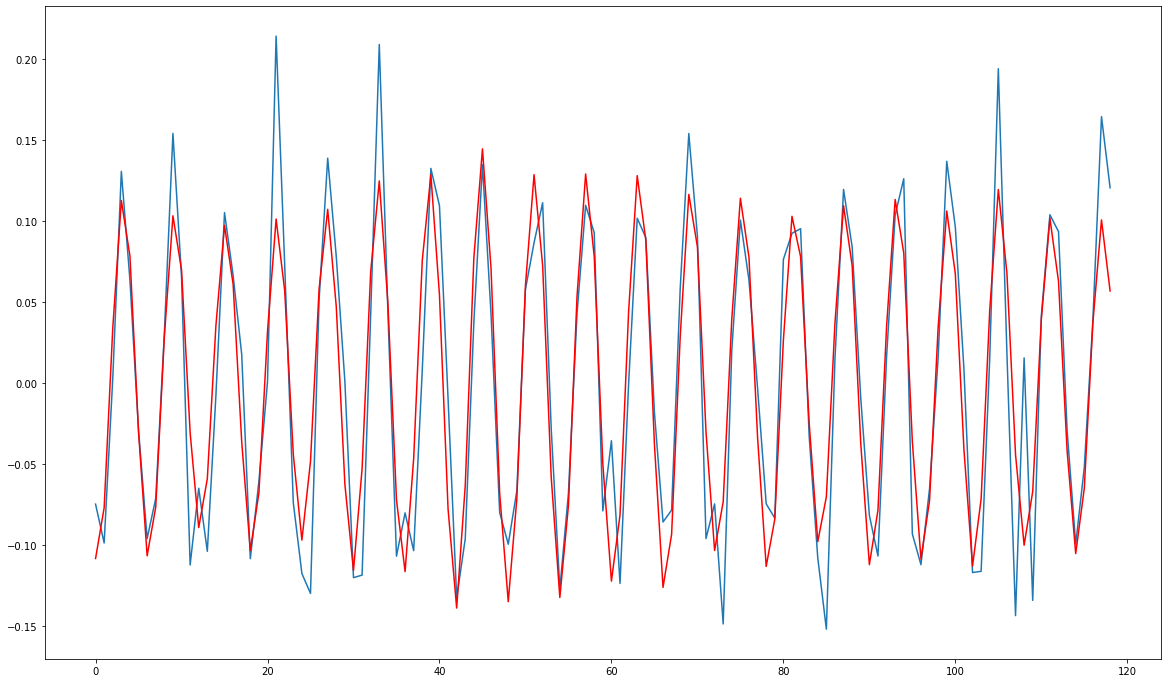

In [34]:
# plot results
plt.figure(figsize=(20,12))
plt.plot(test)
plt.plot(yhat, color='red')
plt.show()

# SARIMA model

RMSE of different interval for SARIMA model is :  102.50217130972273
RSquared of different interval for SARIMA model is :  0.1975026343584664
NSE of different interval for SARIMA model is :  -111.70136319601932


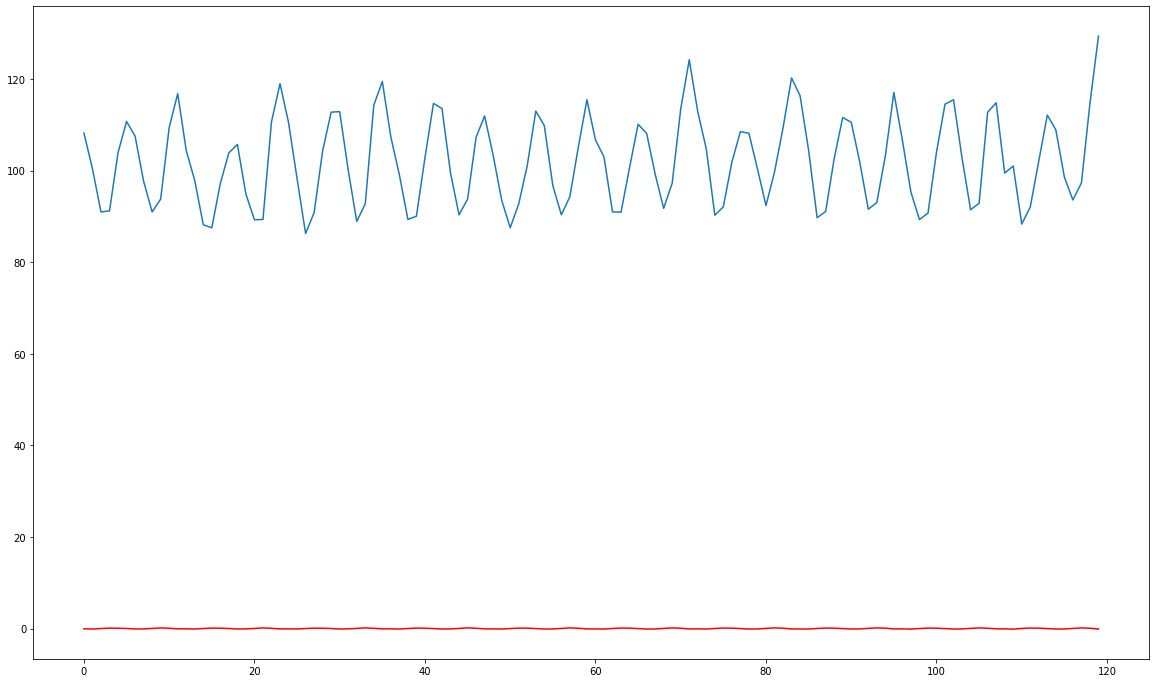

RMSE of different interval for SARIMA model is :  102.90997440730006
RSquared of different interval for SARIMA model is :  3.287941942776138e-05
NSE of different interval for SARIMA model is :  -101.57950147961458


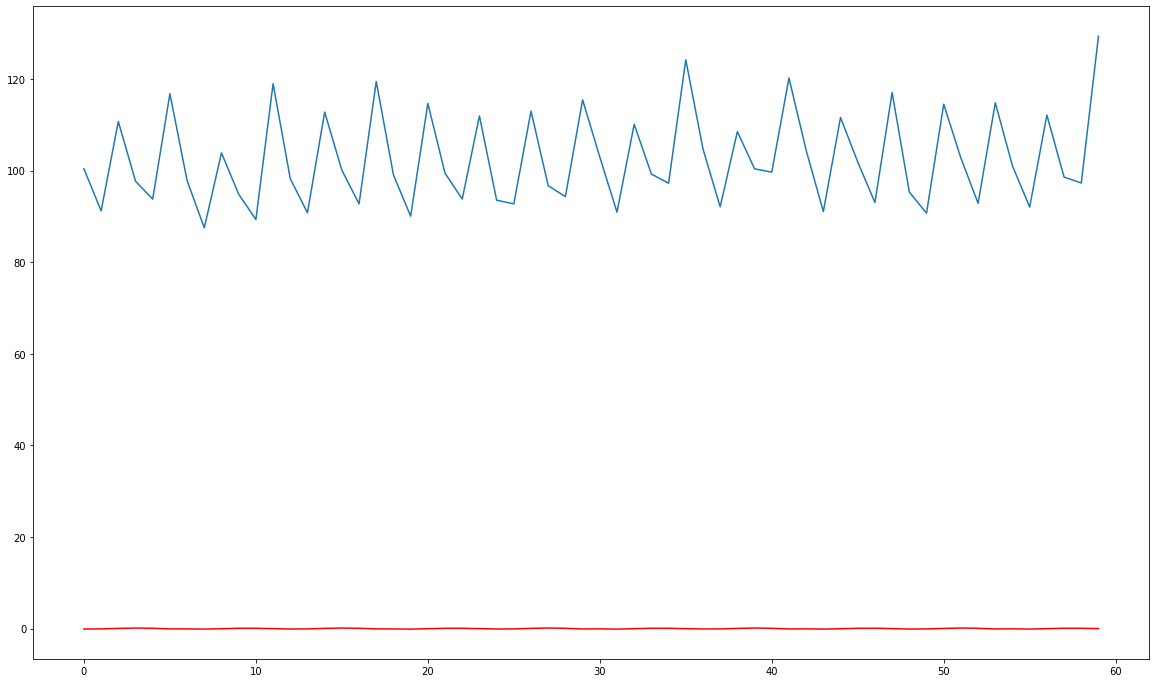

RMSE of different interval for SARIMA model is :  103.40322390595921
RSquared of different interval for SARIMA model is :  0.007446166600234958
NSE of different interval for SARIMA model is :  -61.065302845978024


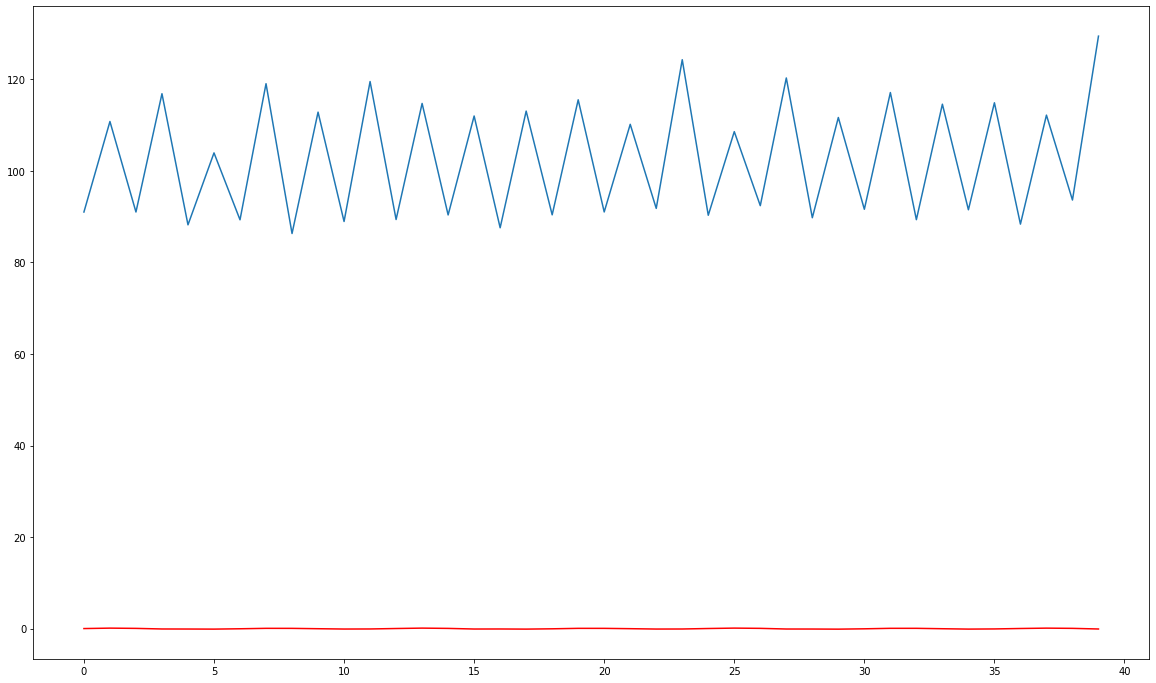

RMSE of different interval for SARIMA model is :  103.7134015756019
RSquared of different interval for SARIMA model is :  0.02426558005185369
NSE of different interval for SARIMA model is :  -72.19226053548587


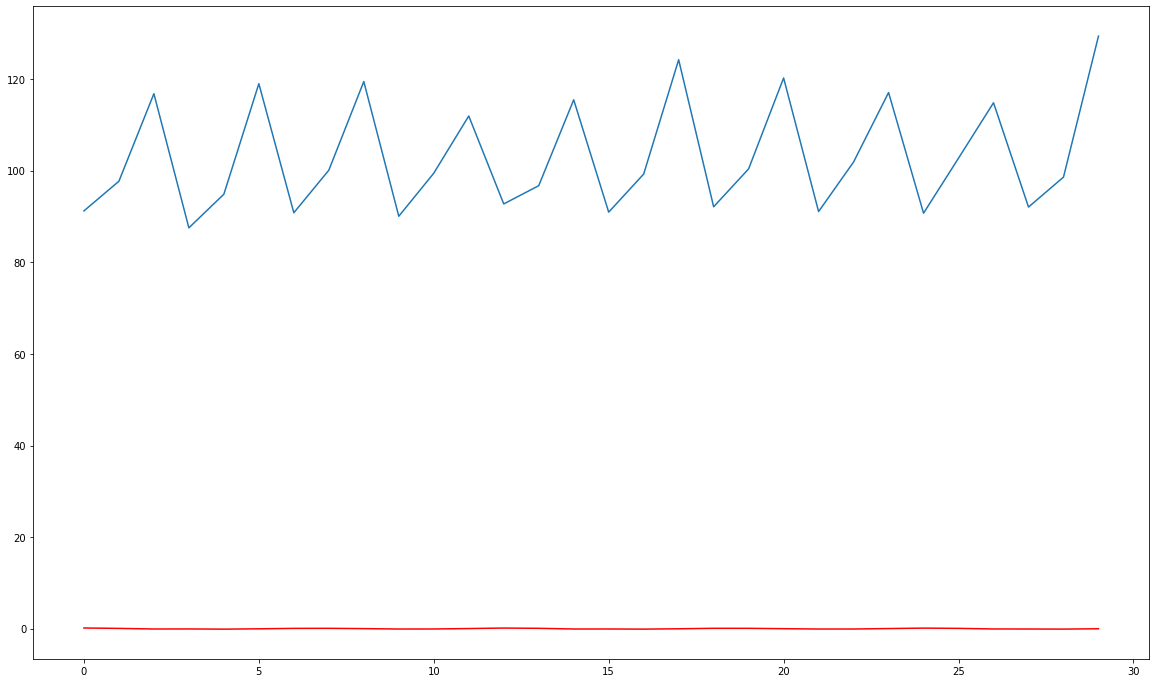

In [35]:
data1 = df['IPG2211A2N'].dropna().to_numpy()
ds1 = [data1[0::1],data1[0::2],data1[0::3],data1[0::4]]
for i in ds1:
  n = int(len(i)*0.7)
  train, test = i[:n], i[n:]
  # fit model
  mod = sm.tsa.statespace.SARIMAX(data,order=(1, 1, 1),seasonal_order=(1, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
  model_fit = mod.fit()

# make prediction
  yhat = model_fit.predict(len(train), len(train)+len(test)-1)
  rmse = sqrt(mean_squared_error(test, yhat))
  r_squared = rsquared(test,yhat)
  n_s_e = NSE(test,yhat)
  print("RMSE of different interval for SARIMA model is : ",rmse)
  print("RSquared of different interval for SARIMA model is : ",r_squared)
  print("NSE of different interval for SARIMA model is : ",n_s_e)
  plt.figure(figsize=(20,12))
  plt.plot(test)
  plt.plot(yhat, color='red')
  plt.show()

In [36]:
data = df['IPG2211A2N'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]

mod = sm.tsa.statespace.SARIMAX(data,order=(1, 1, 1),seasonal_order=(1, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
model_fit = mod.fit()
print(model_fit.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5234      0.046     11.370      0.000       0.433       0.614
ma.L1         -0.9540      0.018    -52.589      0.000      -0.990      -0.918
ar.S.L12    2.268e-06      0.052   4.37e-05      1.000      -0.102       0.102
ma.S.L12      -0.7599      0.044    -17.304      0.000      -0.846      -0.674
sigma2         5.9672      0.361     16.537      0.000       5.260       6.674


In [37]:
# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
r_squared = rsquared(test,yhat)
n_s_e = NSE(test,yhat)

print("RMSE for SARIMA model is : ",rmse)
print("RSquared for SARIMA model is : ",r_squared)
print("NSE for SARIMA model is : ",n_s_e)

RMSE for SARIMA model is :  2.976103161173307
RSquared for SARIMA model is :  0.9069750352401902
NSE for SARIMA model is :  0.9049922570033124


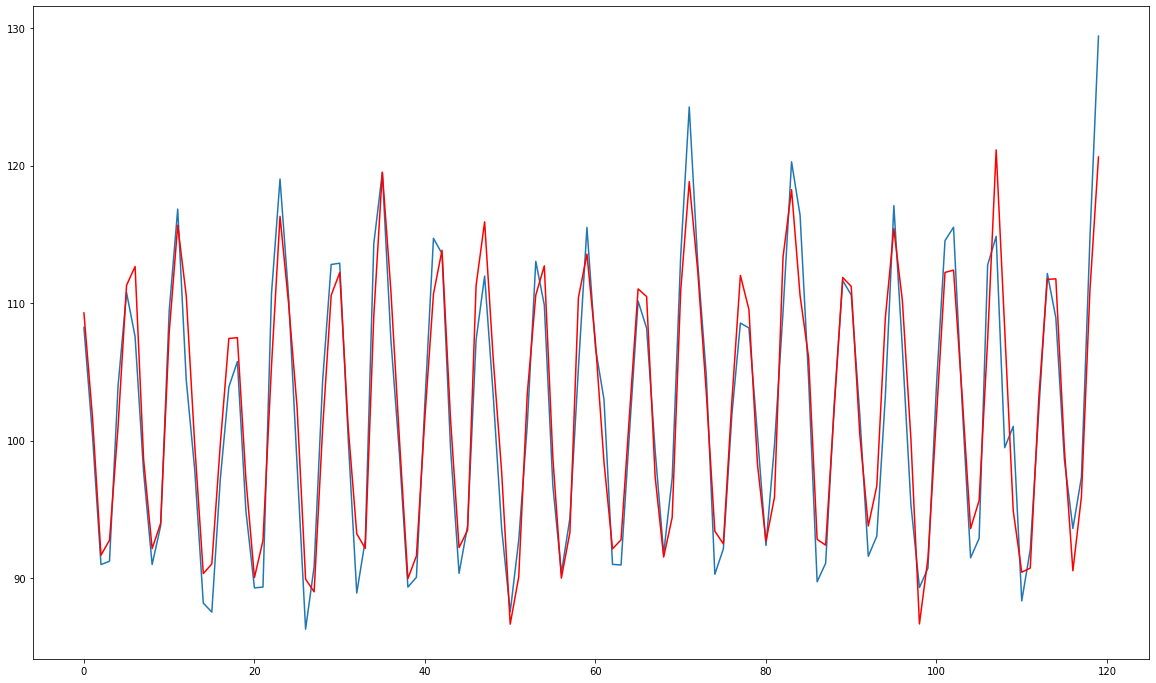

In [38]:
plt.figure(figsize=(20,12))
plt.plot(test)
plt.plot(yhat, color='red')
plt.show()

Based on RMSE value of different model such as AR, MA, ARMA, ARIMA, SARIMA, the model which is giving low RMSE value is ARMA(3,0,3) model and So best predictive result.